In [36]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

In [37]:
# загружаем датасет
boston = datasets.load_boston()
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [38]:
boston_data['PRICE'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


In [40]:
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


In [41]:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)

[37.85733519]


In [42]:
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)

prediction: [[37.85733519]]


In [43]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


In [44]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

LinAlgError: Singular matrix

In [ ]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)

w_hat: [ 6.   -1.25  1.25]


In [ ]:
np.linalg.lstsq(A, y, rcond=None)


(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029, 0.58146041, 0.        ]))

In [ ]:
boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()


,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


In [ ]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


In [ ]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


In [ ]:
print(np.linalg.norm(A_st, axis=0))


[1. 1. 1. 1.]


In [ ]:
# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

In [ ]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


In [ ]:
# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


In [ ]:
v = np.array([5, 1, 2])
u = np.array([4, 2, 8])
print('{:.2f}'.format(np.corrcoef(u, v)[0][1]))

0.05


In [ ]:
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
C = np.corrcoef([x_1, x_2, x_3])
print('Rank:', np.linalg.matrix_rank(C))
print('Determinant: {:.7f}'.format(np.linalg.det(C)))
print(C)


Rank: 3
Determinant: 0.0000005
[[1.         0.99925473 0.99983661]
 [0.99925473 1.         0.99906626]
 [0.99983661 0.99906626 1.        ]]


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
#data = pd.read_csv('unconv.csv')
#data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


<AxesSubplot: >

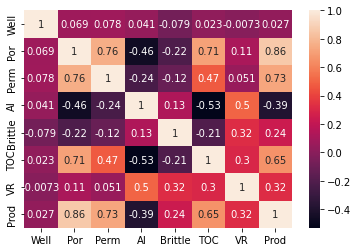

In [ ]:
# Cor = np.corrcoef(data)
sns.heatmap(data.corr(), annot=True)

In [ ]:
r = data.corr()

In [ ]:
print('Rank:', np.linalg.matrix_rank(r))
print('Determinant: {:.7f}'.format(np.linalg.det(r)))


Rank: 8
Determinant: 0.0007299


In [ ]:
X = data.drop('Prod', axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(pd.Series(np.round(w_hat, 0), index=index))

intercept   -1232.0
Well            0.0
Por           230.0
Perm          116.0
AI           -365.0
Brittle        25.0
TOC           -78.0
VR            785.0
dtype: float64


In [ ]:
x_new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024
y_new_pred = x_new @ w_hat
print(np.round(np.abs(y_new_pred - y_new), 0))

25.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = X @ w_hat
print('Result MAPE {:.1f}:'.format(mean_absolute_percentage_error(y, y_pred)*100))

Result MAPE 3.6:


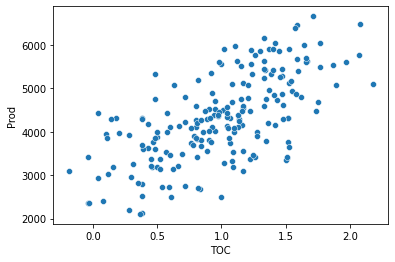

In [ ]:
sns.scatterplot(x='TOC', y='Prod', data=data);


In [ ]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
y_pred = X @ w_hat
print(pd.Series(np.round(w_hat, 0), index=index))
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.1f} %')

intercept   -1835.0
Por           293.0
AI           -200.0
Brittle        28.0
VR            517.0
dtype: float64
MAPE: 4.0 %


In [ ]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 1],
    [1, 9, 4, 1]
]).T
y = np.array([4, 5, 2, 2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 

[2.4        0.46666667 0.13333333]


In [ ]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [1, 9, 4, 1, 25, 169, 1],
    [3, 12, -10, -2, 20, 143, 3],
    [9, 16, 25, 4, 16, 121, 9]
    
]).T
y = np.array([4, 5, 2, 2, 6, 8, -1])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]


In [ ]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [ ]:
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


In [ ]:
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

In [ ]:
A = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
 
A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.73%
MAPE для полинома 5-й степени  112.72%


In [ ]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1126.626557
std,34422.205582
min,-166473.181444
25%,-1.113967
50%,-0.000908
75%,1.960129
max,339979.544947


In [ ]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])

Ранг корреляционной матрицы: 110
Количество факторов: 125


In [ ]:
C = pd.DataFrame(A_poly4[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])

Ранг корреляционной матрицы: 69
Количество факторов: 69


In [ ]:
display(pd.DataFrame(w_hat4).describe())


,PRICE
count,70.000000
mean,-50.817953
std,886.662271
min,-6919.400218
25%,-0.187939
50%,-0.000789
75%,0.322219
max,2305.097504


In [ ]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[["PTRATIO", "RM", "CRIM"]]
y = boston_data[["PRICE"]]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )

MAPE для полинома степени 1 — 21.08%, СКО — 4
MAPE для полинома степени 2 — 16.44%, СКО — 5
MAPE для полинома степени 3 — 15.63%, СКО — 65
MAPE для полинома степени 4 — 15.22%, СКО — 135
MAPE для полинома степени 5 — 14.71%, СКО — 2479


In [ ]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 9],
    [1, 9, 4, 81]
]).T
y = np.array([3, 7, -5, 21])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[ 0.11446013  2.46095638 -0.01608801]


In [52]:
from sklearn.model_selection import cross_validate

In [ ]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
 
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
 
# создаём модель линейной регрессии
lr = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

MAPE на тренировочных фолдах: 12.64 %
MAPE на валидационных фолдах: 24.16 %


In [56]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Lasso 

In [ ]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 12.54 %
MAPE на валидационных фолдах: 17.02 %


In [ ]:
A = np.array([
    [1, 1, 1, 1, 1],
    [5, 9, 4, 3, 5],
    [15, 18, 18, 19, 19],
    [7, 6, 7, 7, 7]
]).T
y = np.array([24, 22, 35, 33, 36])
E = np.eye(4)
# коэффициент регуляризации
alpha = 1
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(np.round(w_hat_ridge, 2))

[-0.09 -1.71  1.91  0.73]


In [47]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [48]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
print('Количество факторов: {}'.format(X_poly.shape[1]))

lr = LinearRegression()
lr.fit(X_poly, y)

cv_results = cross_validate(lr, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.1f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.1f}'.format(-cv_results['test_score'].mean() * 100))

Количество факторов: 34
MAPE на тренировочных фолдах: 1.8
MAPE на валидационных фолдах: 2.7


In [57]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
lasso = Lasso(alpha=5)
lasso.fit(X_poly, y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.28 %


c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+06, tolerance: 1.958e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

lasso = Lasso(alpha=5)
lasso.fit(X_poly, y)

